## 0. Import packages

In [1]:
import pandas as pd
import gzip
import math
from tqdm import tqdm
from itertools import chain, combinations
from Association import Association
from math import sqrt
tqdm.pandas() #for progres_apply etc.

## 1. Load data from previous step

In [2]:
import pickle
train_df = pickle.load(open("pickle_dumps/train_df.p", "rb"))
tests_df = pickle.load(open("pickle_dumps/test_df.p", "rb"))

article_train_df = pickle.load(open("pickle_dumps/article_train_df.p", "rb"))
article_test_df = pickle.load(open("pickle_dumps/article_test_df.p", "rb"))

In [3]:
train_df

,user_id,item_id
2277,2277,"[19, 9, 138, 20, 21, 22, 23, 1237, 14, 1213, 1..."
2503,2503,"[20, 30, 280, 1220, 1619, 42, 40, 26, 476, 27,..."
1579,1579,"[14, 1213, 16, 357, 30, 975, 1109, 1110, 1111,..."
117,117,"[9, 8, 20, 1021, 1022, 1023, 1668, 1669, 280, ..."
3032,3032,"[9, 280, 3299, 304, 1932, 19, 20, 21, 22, 23, ..."
...,...,...
693,693,"[9, 280, 42, 1228, 104, 1682, 140, 392, 98, 12..."
1631,1631,"[0, 277, 278, 8, 2, 3, 5, 9, 280, 745, 24, 1, ..."
2522,2522,"[19, 21, 280, 3549, 2447, 48, 1399, 1053, 1400..."
714,714,"[8, 19, 21, 280, 288, 518, 97, 42, 2541, 1223,..."


192.03803803803802


(array([122.,  98.,  94.,  75.,  64.,  62.,  49.,  39.,  37.,  33.,  30.,
         24.,  27.,  20.,  19.,  23.,  12.,  15.,  13.,  16.,  12.,   4.,
         14.,   7.,  10.,   5.,   7.,   5.,   9.,   7.,   4.,   1.,   5.,
          1.,   5.,   2.,   3.,   3.,   2.,   1.,   2.,   2.,   3.,   0.,
          2.,   2.,   2.,   3.,   3.,   1.]),
 array([101.  , 110.88, 120.76, 130.64, 140.52, 150.4 , 160.28, 170.16,
        180.04, 189.92, 199.8 , 209.68, 219.56, 229.44, 239.32, 249.2 ,
        259.08, 268.96, 278.84, 288.72, 298.6 , 308.48, 318.36, 328.24,
        338.12, 348.  , 357.88, 367.76, 377.64, 387.52, 397.4 , 407.28,
        417.16, 427.04, 436.92, 446.8 , 456.68, 466.56, 476.44, 486.32,
        496.2 , 506.08, 515.96, 525.84, 535.72, 545.6 , 555.48, 565.36,
        575.24, 585.12, 595.  ]),
 <BarContainer object of 50 artists>)

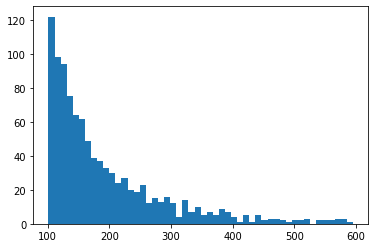

In [4]:
import matplotlib.pyplot as plt
x = [len(i) for i in train_df["item_id"]]
print(sum(x)/len(x))
plt.hist(x, bins=50)

In [5]:
article_train_df

,item_id,user_id
2,138,"[2277, 117, 2622, 1325, 1276, 773, 1838, 1134,..."
7,1237,"[2277, 1579, 2087, 1180, 2054, 761, 922, 1106,..."
8,14,"[2277, 1579, 1647, 2087, 1325, 2309, 788, 1134..."
9,1213,"[2277, 1579, 2627, 1598, 1276, 3041, 1356, 300..."
10,16,"[2277, 1579, 1276, 788, 498, 1134, 1504, 2061,..."
...,...,...
6403,4344,"[778, 2484]"
6419,3214,"[152, 2339]"
6421,4714,"[499, 1521]"
6438,4033,"[359, 3138]"


31.684868943606038


(array([2.449e+03, 7.160e+02, 4.380e+02, 2.560e+02, 1.720e+02, 1.330e+02,
        9.800e+01, 8.000e+01, 7.700e+01, 7.200e+01, 5.600e+01, 4.300e+01,
        4.900e+01, 3.400e+01, 3.300e+01, 2.500e+01, 3.000e+01, 1.800e+01,
        1.700e+01, 1.500e+01, 1.400e+01, 2.600e+01, 1.400e+01, 1.300e+01,
        7.000e+00, 5.000e+00, 1.800e+01, 8.000e+00, 8.000e+00, 7.000e+00,
        1.400e+01, 1.000e+01, 5.000e+00, 8.000e+00, 5.000e+00, 5.000e+00,
        5.000e+00, 5.000e+00, 1.000e+01, 7.000e+00, 2.000e+00, 7.000e+00,
        2.000e+00, 0.000e+00, 2.000e+00, 1.000e+01, 2.000e+00, 1.000e+00,
        2.000e+00, 3.000e+00]),
 array([  2.  ,   9.86,  17.72,  25.58,  33.44,  41.3 ,  49.16,  57.02,
         64.88,  72.74,  80.6 ,  88.46,  96.32, 104.18, 112.04, 119.9 ,
        127.76, 135.62, 143.48, 151.34, 159.2 , 167.06, 174.92, 182.78,
        190.64, 198.5 , 206.36, 214.22, 222.08, 229.94, 237.8 , 245.66,
        253.52, 261.38, 269.24, 277.1 , 284.96, 292.82, 300.68, 308.54,
        316.4 , 

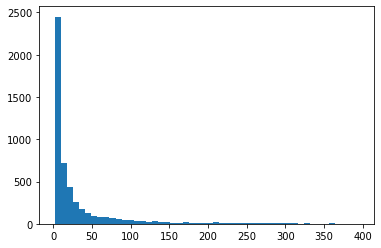

In [6]:
x = [len(i) for i in article_train_df["user_id"]]
print(sum(x)/len(x))
plt.hist(x, bins=50)

In [7]:
tests_df

,user_id,item_id
488,488,"[280, 19, 20, 21, 22, 23, 24, 25, 46, 47, 146,..."
3080,3080,"[11, 1377, 1225, 68, 69, 67, 74, 1413, 104, 21..."
641,641,"[280, 143, 153, 19, 20, 21, 22, 23, 24, 25, 23..."
965,965,"[1668, 1669, 280, 9, 24, 308, 310, 1087, 1220,..."
1274,1274,"[0, 1, 2, 3, 4, 5, 6, 7, 19, 21, 9, 20, 22, 23..."
...,...,...
2985,2985,"[10, 280, 1143, 292, 293, 294, 300, 19, 20, 21..."
1271,1271,"[19, 21, 9, 280, 304, 29, 3333, 518, 2343, 97,..."
2531,2531,"[6, 19, 21, 9, 0, 2, 3, 5, 277, 278, 1021, 102..."
2895,2895,"[19, 21, 280, 1087, 518, 2447, 42, 43, 147, 16..."


In [8]:
data = train_df.set_index("user_id").to_dict()["item_id"]
article_data = article_train_df.set_index("item_id").to_dict()["user_id"]

In [9]:
def eclat(prefix, minsup, items, start=True):
    frequents = []
    while items:
        i,itids = items.pop()
        isupp = len(itids)
        if isupp >= minsup:
            frequents.append((frozenset(prefix + [i]), isupp))
            suffix = [] 
            for j, ojtids in items:
                jtids = set(itids) & set(ojtids)
                if len(jtids) >= minsup:
                    suffix.append((j,jtids))
            frequents.extend(eclat(prefix+[i], minsup, sorted(suffix, key=lambda item: len(item[1]), reverse=True), False))
    return frequents

In [10]:
def subsets(itemset, include_empty_set=False):
    """ List all strict subsets of an itemset without the empty set or with the empty set if include_empty_set=True
        subsets({1,2,3}) --> [{1}, {2}, {3}, {1, 2}, {1, 3}, {2, 3}]
    """
    s = list(itemset)
    if include_empty_set:
        return map(set, chain.from_iterable(combinations(s, r) for r in range(0, len(s) + 1)))
    return map(set, chain.from_iterable(combinations(s, r) for r in range(1, len(s))))

In [11]:
def deriveRules(itemsets, minconf, test_users):
    """ Returns all rules with conf >= minconf that can be derived from the itemsets.
        Return: list of association rules in the format: [(antecedent, consequent, supp, conf), ...]
    """
    search_items = dict(itemsets)
    rules = []
    for item_set, supp in tqdm(itemsets):
        go = False
        if len(item_set) > 1:
            for subset in subsets(item_set):  # for each subset generate a rule
                antecedent = frozenset(subset)
                consequent = item_set - subset
                if len(consequent)== 1:
                    conf = supp / search_items[antecedent]
                    if conf >= minconf:
                        if test_users:
                            if list(consequent)[0] in test_users:
                                rules.append(Association(antecedent, consequent, conf, supp))
                        else:
                            rules.append(Association(antecedent, consequent, conf, supp))
                        

    return rules

In [12]:
def genRules(min_conf, minsup, data, test_users = None):
    print("---Mining frequent itemsets---")
    frequent_itemsets = eclat([], minsup, sorted(data.items(), key=lambda item: len(item[1]), reverse=True))
    print(f"{len(frequent_itemsets)} frequent itemsets")
    c = 0
    for f in frequent_itemsets:
        if len(f[0]) == 1:
            c += 1
    print(f"{c} frequent itemsets of length 1")
    print("---Generating rules---")
    return deriveRules(frequent_itemsets, min_conf, test_users)

In [13]:
%%time

print(len(data))
article_assos_rules = genRules(0.85, 50, data)

999
---Mining frequent itemsets---
4611886 frequent itemsets
999 frequent itemsets of length 1
---Generating rules---


100%|██████████| 4611886/4611886 [01:50<00:00, 41666.01it/s]

Wall time: 3min 36s


In [14]:
len(article_assos_rules)

6997716

In [15]:
%%time
counter = 0
for r in article_assos_rules:
    if 3 in r.left:
        counter += 1
counter

Wall time: 976 ms


74784

In [16]:
for r in article_assos_rules:
    if r.s > 150:
        print(r)

Conf: 0.87	Supp: 158.00	 {1328, 1276, 1839} => {1576}


In [17]:
%%time
import copy
# user_assos_rules = genRules(0.0, 20, article_data)
print(len(article_data))
test_users = tests_df["user_id"].tolist()

rules_split = []
for i in range(4):
    print(f"Mining rules for split {i}")
    tmp = copy.deepcopy(article_data)
    for _, article in article_test_df.iterrows():
        try:
            if article["item_id"] in tmp:
                tmp[article["item_id"]] += article["test_split"][i][0]
            else:
                tmp[article["item_id"]] = article["test_split"][i][0]
#                 print(tmp[article["item_id"]])
#                 break
        except:
            if article["item_id"] in tmp:
                tmp[article["item_id"]] += article["user_id"]
            else:
                tmp[article["item_id"]] = article["user_id"]
        
    r = genRules(0.0,40,tmp, test_users)
    rules_split.append(r)

5036
Mining rules for split 0
---Mining frequent itemsets---
1732291 frequent itemsets
1100 frequent itemsets of length 1
---Generating rules---


100%|██████████| 1732291/1732291 [02:31<00:00, 11451.95it/s]


Mining rules for split 1
---Mining frequent itemsets---
1571028 frequent itemsets
1104 frequent itemsets of length 1
---Generating rules---


100%|██████████| 1571028/1571028 [02:20<00:00, 11151.85it/s]


Mining rules for split 2
---Mining frequent itemsets---
1616877 frequent itemsets
1109 frequent itemsets of length 1
---Generating rules---


100%|██████████| 1616877/1616877 [02:30<00:00, 10759.52it/s]


Mining rules for split 3
---Mining frequent itemsets---
1713377 frequent itemsets
1113 frequent itemsets of length 1
---Generating rules---


100%|██████████| 1713377/1713377 [02:43<00:00, 10509.52it/s]

Wall time: 12min


In [18]:
for i in range(4):
    print(len(rules_split[i]))

314345
297308
331005
331241


In [19]:
corr = {}
test_users = tests_df["user_id"].tolist()
for user in test_users:
    for r in rules_split[3]:
        if user in list(r.right):
            if user in corr:
                corr[user] += 1
            else:
                corr[user] = 1

In [20]:
print(len(test_users))
print(len(corr))
print(corr)

101
24
{460: 2104, 1472: 195, 1157: 39, 2114: 67, 68: 865, 1678: 166569, 296: 3, 1146: 12, 119: 1, 2502: 29, 2316: 16, 2353: 12, 2178: 1, 563: 1824, 1236: 8495, 1030: 661, 2025: 59, 568: 49, 1155: 18, 213: 142503, 2: 4188, 1805: 3353, 1022: 139, 2531: 39}


In [21]:
# user_assos_rules = genRules(0.0, 20, article_data)

"""
train: [
a: 1,2,3
b: 2,3,4
c: 1,5,7
]

test: [
d: 2,4,8
e: 1,3,7
]

rules voor train + 1e block van test -> maak recomm met als test test-1e block
rules voor train + 2e block van test -> maak recomm met als test test-2e block
...

"""

'\ntrain: [\na: 1,2,3\nb: 2,3,4\nc: 1,5,7\n]\n\ntest: [\nd: 2,4,8\ne: 1,3,7\n]\n\nrules voor train + 1e block van test -> maak recomm met als test test-1e block\nrules voor train + 2e block van test -> maak recomm met als test test-2e block\n...\n\n'

# normalize support / confidence to better use it later

In [22]:
minc = 1
maxc = 0

mins = 9999999999999
maxs = -9999999999999
for a in article_assos_rules:
    if a.c < minc:
        minc = a.c
    if a.c > maxc:
        maxc = a.c
    
    if a.s < mins:
        mins = a.s
    if a.s > maxs:
        maxs = a.s
            
for a in article_assos_rules:
    a.c = (a.c - minc) / (maxc - minc)
    a.s = (a.s - mins) / (maxs - mins)
    # temp score that's just lhs + weighted average of c, s
    a.score = len(a.left) + sqrt(pow(a.c, 2) + pow(a.s, 2))

article_assos_rules = sorted(article_assos_rules, key = lambda x: x.score, reverse=True)
for i in article_assos_rules[:100]:
    print(i)

Conf: 1.00	Supp: 50.00	 {736, 4, 167, 1576, 780, 750, 1839, 212, 1597} => {1328}
Conf: 1.00	Supp: 50.00	 {736, 167, 1576, 780, 750, 1839, 1328, 212, 1597} => {4}
Conf: 0.98	Supp: 50.00	 {736, 4, 167, 1576, 780, 750, 1328, 212, 1597} => {1839}
Conf: 0.98	Supp: 50.00	 {736, 4, 167, 1576, 750, 1839, 1328, 212, 1597} => {780}
Conf: 0.98	Supp: 50.00	 {4, 167, 1576, 780, 750, 1839, 1328, 212, 1597} => {736}
Conf: 0.96	Supp: 50.00	 {736, 4, 167, 1576, 780, 750, 1839, 1328, 212} => {1597}
Conf: 0.96	Supp: 50.00	 {736, 4, 167, 1576, 780, 750, 1839, 1328, 1597} => {212}
Conf: 0.96	Supp: 50.00	 {736, 4, 167, 1576, 780, 1839, 1328, 212, 1597} => {750}
Conf: 0.96	Supp: 50.00	 {736, 4, 167, 780, 750, 1839, 1328, 212, 1597} => {1576}
Conf: 0.96	Supp: 50.00	 {736, 4, 1576, 780, 750, 1839, 1328, 212, 1597} => {167}
Conf: 1.00	Supp: 54.00	 {736, 4, 1576, 1960, 750, 1328, 1276, 1597} => {1839}
Conf: 1.00	Supp: 54.00	 {736, 1576, 1960, 750, 1839, 1328, 1276, 1597} => {4}
Conf: 1.00	Supp: 54.00	 {1089, 4, 

# ??. Store the association rules as pickle file for further use

In [23]:
import pickle
pickle.dump(article_assos_rules, open("pickle_dumps/article_rules.p", "wb"))
pickle.dump(rules_split, open("pickle_dumps/user_rules.p", "wb"))